1.0 Business understanding 
    1.1 Analysis of the India Start_up ecosystem based on funding from 2018-2021

    1.1.2 Project Description 
    This project focuses on the funding received by start_ups in India from 2018-2021. Our objective is to analyse the data and help management make informed decision in terms of where to situate in India and possible funding we can attract


2.0 Data Preparation 

In [163]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [164]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [165]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

warnings.filterwarnings('ignore')

In [166]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [167]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [168]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query2020 = "select * from dbo.LP1_startup_funding2020"




df_2020 = pd.read_sql(query2020, connection)

In [169]:
df_2020.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
5,qZense,2019.0,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed,None
6,MyClassboard,2008.0,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000.0,Pre-series A,None
7,Metvy,2018.0,Gurgaon,Networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,NaN,Pre-series,None
8,Rupeek,2015.0,Bangalore,FinTech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.0,Series C,None
9,Gig India,2017.0,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000.0,Pre-series A,None


In [170]:
query2021 = "select * from dbo.LP1_startup_funding2021"




df_2021 = pd.read_sql(query2021, connection)

In [171]:
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [172]:
df_2018 = pd.read_csv("startup_funding2018.csv")


In [173]:
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [174]:
df_2019 = pd.read_csv("startup_funding2019.csv")


In [175]:
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [176]:
df_2020.shape, df_2021.shape, df_2018.shape, df_2019.shape

((1055, 10), (1209, 9), (526, 6), (89, 9))

In [177]:
df_2020.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [178]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [179]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [180]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [181]:
df_2020.to_csv('startup_function2020.csv', index = False)

In [182]:
df_2021.to_csv('startup_function2021.csv', index = False)

2.1  Null hypothesis: The location os a business doesn't affeact the amount of funding received from investors.
Alternate hypothesis: The location of a business significantly affects the amount of funding issued by investors 
    2.1.1 To test this hypothesis we will examine the distribution of start_ups across cities and deduce which cities have the most highly funded start_ups 

2.2 The formulated question for our analysis
1. To what extend do cities influence funding?
2. which industries are preferred by investors for funding?
3. What is the typical funding amount the startups receive in India?
4. How does the type of industry affect how the startup is funded?
5. Average number of fund received each year by the companies?


3.0 Data Praparation 

In [183]:
#Cleaning 2018_data 
#load the data 
df_2018 = pd.read_csv('startup_funding2018.csv')

In [184]:
df_2018.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [185]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [186]:
df_2018.isnull().sum() 

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [187]:
#checking the unique value of Round/series
df_2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [188]:
df_2018[df_2018['Round/Series']=='https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593']

,Company Name,Industry,Round/Series,Amount,Location,About Company
178,BuyForexOnline,Travel,https://docs.google.com/spreadsheets/d/1x9ziNe...,2000000,"Bangalore, Karnataka, India",BuyForexOnline.com is India's first completely...


In [189]:
#dropping the row 164
df_2018=df_2018.drop(index=178)

In [190]:
#checking the unique value of Location
df_2018['Location'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [191]:
#splitting the industry column using the comma
df_2018['Location'] = df_2018['Location'].str.split(',').str[0]

In [192]:
df_2018.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000",Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000",Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,Hyderabad,Eunimart is a one stop solution for merchants ...


In [193]:
#cheacking the unique value of amount
df_2018['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [194]:
# changing the repuss currency into dollors currency using the exchange rates

for row in df_2018.index:

    for column in df_2018.columns:

        if '₹' in str(df_2018.loc[row, column]):

            amount = df_2018.loc[row, column].replace('₹', '').replace(',', '')

            df_2018.loc[row, column] = pd.to_numeric(amount, errors='coerce') * 0.146

        elif '$' in str(df_2018.loc[row, column]):

            df_2018.loc[row, column] = df_2018.loc[row, column].replace('$', '').replace(',', '')

        elif "—" in str(df_2018.loc[row, column]):

            df_2018.loc[row, column] = df_2018.loc[row, column].replace("—", '')

In [195]:
df_2018.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,5840000.0,Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,9490000.0,Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,,Hyderabad,Eunimart is a one stop solution for merchants ...


In [196]:
df_2018['Amount'].unique()

array(['250000', 5840000.0, 9490000.0, '2000000', '', '1600000',
       2336000.0, 7300000.0, 14600000.0, '150000', '1100000', 73000.0,
       '6000000', '650000', 5110000.0, 9344000.0, 2920000.0, '1000000',
       '5000000', '4000000', 4380000.0, '2800000', '1700000', '1300000',
       730000.0, 1825000.0, 2190000.0, '500000', 15183999.999999998,
       6570000.0, '13400000', 3650000.0, 3854399.9999999995, 1168000.0,
       8760.0, '9000000', '100000', '20000', '120000', 4964000.0,
       49932000.0, '143145', 87600000.0, '742000000', 146000000.0,
       292000000.0, '3980000', '10000', 14599.999999999998, 36500000.0,
       '1000000000', '7000000', '35000000', 80300000.0, '28500000',
       35040000.0, 17520000.0, '2400000', '30000000', 365000000.0,
       '23000000', '11000000', 6424000.0, '3240000', 8760000.0,
       '540000000', 94900000.0, 233600000.0, '900000', '10000000',
       '1500000', 10220000.0, '14000000', 14964999.999999998, '100000000',
       175200.0, 759200000.0, '8

In [197]:
# replace commas and extract numbers to create a new column
df_2018['Amount($)'] = df_2018['Amount'].str.replace(',', '').str.extract(r'(\d+)').astype(float)


In [198]:
# # fill null values with the mode in the Amount($) column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer_18 = imputer.fit(df_2018[['Amount($)']])
df_2018['Amount($)'] = imputer_18.transform(df_2018[['Amount($)']])

In [199]:
# confirm null value have been replaced
df_2018['Amount($)'].isnull().sum()

0

In [200]:
#changing of column name 
df_2018.rename(columns = {'Company Name' :'Company/Brand', 'Industry' :'Sector', 'Round/Series':'Stage','Amount':'Amount($)','About Company':'What it does'}, inplace = True)

In [201]:
# Get the cardinality/number of unique values in each column
df_2018.nunique()

Company/Brand    524
Sector           405
Stage             20
Amount($)        180
Location          50
What it does     523
Amount($)         98
dtype: int64

In [202]:
# splitting the values in Sector columns  using a comma as the delimiter and selected the first value as the primary sector.
#spliting the location column 
df_2018['Sector'] = df_2018['Sector'].str.split(',').str[0]
df_2018.head(5)

,Company/Brand,Sector,Stage,Amount($),Location,What it does,Amount($)
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0
1,Happy Cow Dairy,Agriculture,Seed,5840000.0,Mumbai,A startup which aggregates milk from dairy far...,1000000.0
2,MyLoanCare,Credit,Series A,9490000.0,Gurgaon,Leading Online Loans Marketplace in India,1000000.0
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2000000.0
4,Eunimart,E-Commerce Platforms,Seed,,Hyderabad,Eunimart is a one stop solution for merchants ...,1000000.0


In [203]:
# Create Year of Funding column
df_2018['Year of Funding'] = '2018'
df_2018.head(5)

,Company/Brand,Sector,Stage,Amount($),Location,What it does,Amount($),Year of Funding
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018
1,Happy Cow Dairy,Agriculture,Seed,5840000.0,Mumbai,A startup which aggregates milk from dairy far...,1000000.0,2018
2,MyLoanCare,Credit,Series A,9490000.0,Gurgaon,Leading Online Loans Marketplace in India,1000000.0,2018
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018
4,Eunimart,E-Commerce Platforms,Seed,,Hyderabad,Eunimart is a one stop solution for merchants ...,1000000.0,2018


In [204]:
# checking for duplicates
df_2018.duplicated().sum()

1

In [205]:
# lets have a look at rows with duplicates
df_2018.loc[df_2018.duplicated()]

,Company/Brand,Sector,Stage,Amount($),Location,What it does,Amount($),Year of Funding
348,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018


In [206]:
df_2018=df_2018.drop(index=348)

In [207]:
df_2018.to_csv('data_claning_2018.csv', index = False)

In [208]:
#loading 2019 data
df_2019= pd.read_csv('startup_funding2019.csv')
df_2021.head(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [209]:
#Preview of dataset summary information using info method.

df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [210]:
#View of number of rows and columns in 2019 dataset
num_f_colmns = df_2019.shape[(1)]
num_f_rows = df_2019.shape[(0)]

print('Number of rows in 2019 dataset:',num_f_rows)
print('Number of columns in 2019 dataset:',num_f_colmns)

Number of rows in 2019 dataset: 89
Number of columns in 2019 dataset: 9


In [211]:
# Preview of description summary of numerical columns using describe method

df_2019.describe()

,Founded
count,60.000000
mean,2014.533333
std,2.937003
min,2004.000000
25%,2013.000000
50%,2015.000000
75%,2016.250000
max,2019.000000


In [212]:
# Preview of description summary of categorical columns using describe method
df_2019.describe(include=object)

,Company/Brand,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
count,89,70,84,89,86,89,89,43
unique,87,17,52,88,85,86,50,15
top,Kratikal,Bangalore,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,Undisclosed,Series A
freq,2,21,7,2,2,3,12,10


In [213]:
#Let us check for duplicates in our datas
duplicate_vals = df_2019.duplicated().sum()

#The 2019 dataset has no duplicate values

print("Count of duplicate values:",duplicate_vals)

Count of duplicate values: 0


In [214]:
#Check of number of missing values in our dataset.(i.e Total NAN values per column)
missin_vals = df_2019.isnull().sum()

#The 2019 dataset contains missing values

missin_vals

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [215]:
#conversion of missing value as percentage to enable comparison and inference
#we get total percentage of missing data in each column
#gives inference of whether to delete data or not

missing_percent = (df_2019.isnull().sum()/len(df_2019)) * 100

missing_percent

Company/Brand     0.000000
Founded          32.584270
HeadQuarter      21.348315
Sector            5.617978
What it does      0.000000
Founders          3.370787
Investor          0.000000
Amount($)         0.000000
Stage            51.685393
dtype: float64

In [216]:
#Boolean filtering of percentage missing data greater than 0 in columns
#only columns selected have missing percentage > 0

def missing_percent(table):
    missing_percent = (df_2019.isnull().sum()/len(df_2019)) * 100
    missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
    return missing_percent

In [217]:
# per_nan = percentage nan

per_nan = missing_percent(df_2019)

per_nan

Stage          51.685393
Founded        32.584270
HeadQuarter    21.348315
Sector          5.617978
Founders        3.370787
dtype: float64

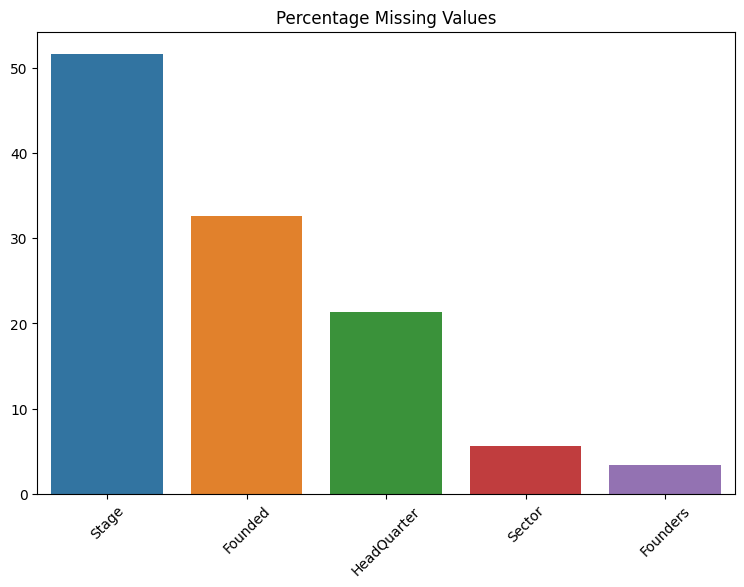

In [218]:
#Let us visualize to infer missing data for comprehensive understanding
#NBper_nan is a series data that is indexed(with only one column)
#NBseaborn and matplotlib are compatible, we'll us matplotlib's 'plt.xticks()' to do x-axis rotation 

plt.figure(figsize=(9, 6))
sns.barplot(x=per_nan.index, y=per_nan)
plt.xticks(rotation = 45)
plt.title("Percentage Missing Values");
#plt.ylim(3, 21)
#to get columns with missing data btwn 3 to 21 percentage, we use function 'plt.ylim()'

In [219]:
#let us clean column named 'founded' 
#we will fill in missing values with the median value
elements = df_2019["Founded"].unique()
elements

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [220]:
#Count of missing values in column 'founded'

missn_vals = df_2019["Founded"].isna().sum()
missn_vals 
print("Count of missing values in Founded column:",missn_vals)

Count of missing values in Founded column: 29


In [221]:
#Convert the column to numeric, coercing non-numeric values to NaN:
#pd.to_numeric() converts values to float

df_2019["Founded"] = pd.to_numeric(df_2019["Founded"], errors='coerce')

#Calculate the median of the column, ignoring the NaN values:
median_value = df_2019["Founded"].median(skipna=True)

median_value

2015.0

In [222]:
#Replace the NaN values with the calculated median:
df_2019["Founded"].fillna(median_value, inplace=True)

In [223]:
#Any missing values?
#confirm whether there are any NAN values (missing_values)
df_2019["Founded"].isna().values.any()

False

In [224]:
#we will clean column 'Headquarter'
#We will fill up missing values with the mode(most occuring instance)

#Let us use unique() method to examine the unique values:
df_2019['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [225]:
#Check on data
df_2019['HeadQuarter']

0           NaN
1        Mumbai
2        Mumbai
3       Chennai
4     Telangana
        ...    
84       Mumbai
85     Gurugram
86        Delhi
87        Delhi
88    Rajasthan
Name: HeadQuarter, Length: 89, dtype: object

In [226]:
#Calculate the mode of the column:
#The iloc indexer is used to retrieve the first value from the mode result.
#The mode() function returns a pandas Series object that contains the mode(s) of the column.

mode_value = df_2019["HeadQuarter"].mode().iloc[0]

mode_value

'Bangalore'

In [227]:
#Replace the missing values with the mode:
df_2019["HeadQuarter"].fillna(mode_value, inplace=True)

In [228]:
#Any missing values?
#Let us confirm whether there are any NAN values after changes
df_2019["HeadQuarter"].isna().values.any()

False

In [229]:
#Let us clean column 'sector' 
#Column has inconsistencies and some elements needs to be renamed to have consistent format
#Let us use unique() method to examine the unique values:
print(df_2019["Sector"].unique())

['Ecommerce' 'Edtech' 'Interior design' 'AgriTech' 'Technology' 'SaaS'
 'AI & Tech' 'E-commerce' 'E-commerce & AR' 'Fintech' 'HR tech'
 'Food tech' 'Health' 'Healthcare' 'Safety tech' 'Pharmaceutical'
 'Insurance technology' 'AI' 'Foodtech' 'Food' 'IoT' 'E-marketplace'
 'Robotics & AI' 'Logistics' 'Travel' 'Manufacturing' 'Food & Nutrition'
 'Social Media' nan 'E-Sports' 'Cosmetics' 'B2B' 'Jewellery'
 'B2B Supply Chain' 'Games' 'Food & tech' 'Accomodation' 'Automotive tech'
 'Legal tech' 'Mutual Funds' 'Cybersecurity' 'Automobile' 'Sports'
 'Healthtech' 'Yoga & wellness' 'Virtual Banking' 'Transportation'
 'Transport & Rentals' 'Marketing & Customer loyalty' 'Infratech'
 'Hospitality' 'Automobile & Technology' 'Banking']


In [230]:
#Check of counts of each category in the column
df_2019["Sector"].value_counts().sort_values(ascending=False)

Sector
Edtech                          7
Fintech                         5
AgriTech                        4
Technology                      4
SaaS                            4
Automobile                      3
E-commerce                      3
Logistics                       3
IoT                             2
E-marketplace                   2
AI                              2
Automotive tech                 2
Accomodation                    2
Foodtech                        2
Food                            2
Pharmaceutical                  1
Interior design                 1
AI & Tech                       1
E-commerce & AR                 1
HR tech                         1
Food tech                       1
Health                          1
Healthcare                      1
E-Sports                        1
B2B                             1
Insurance technology            1
Robotics & AI                   1
Travel                          1
Manufacturing                   1
Social 

In [231]:
#Creation of a function to attain consistency in names of elements

from fuzzywuzzy import fuzz

def rename_similar_names(data, Sector):
    # Create a copy of the dataframe to avoid modifying the original data
    dff = data.copy()

     # Convert values in the specified column to strings
    dff[Sector] = dff[Sector].astype(str)

    # Iterate over each unique value in the specified column
    for value in dff[Sector].unique():
        similar_names = [name for name in dff[Sector].unique() if fuzz.ratio(value, name) >= 75]
        # Identify similar names with a similarity ratio of at least 80
        
        if len(similar_names) > 1:
            # If there are multiple similar names, choose a consistent name for all of them
            consistent_name = min(similar_names, key=len)  # You can change the selection criteria as per your preference
            
            # Replace the similar names with the consistent name
            dff[Sector].replace(similar_names, consistent_name, inplace=True)

    return dff

In [232]:
# Rename similar names in the 'Sector' column
df_cleaned = rename_similar_names(df_2019, "Sector")

#check of unique elements after renaming our columns
print(df_cleaned["Sector"].unique())

['Ecommerce' 'Edtech' 'Interior design' 'AgriTech' 'Technology' 'SaaS'
 'AI & Tech' 'Fintech' 'HR tech' 'Foodtech' 'Health' 'Safety tech'
 'Pharmaceutical' 'Insurance technology' 'AI' 'Food' 'IoT' 'E-marketplace'
 'Robotics & AI' 'Logistics' 'Travel' 'Manufacturing' 'Food & Nutrition'
 'Social Media' 'nan' 'Sports' 'Cosmetics' 'B2B' 'Jewellery'
 'B2B Supply Chain' 'Games' 'Accomodation' 'Automotive tech' 'Legal tech'
 'Mutual Funds' 'Cybersecurity' 'Automobile' 'Yoga & wellness'
 'Virtual Banking' 'Transportation' 'Transport & Rentals'
 'Marketing & Customer loyalty' 'Infratech' 'Hospitality'
 'Automobile & Technology' 'Banking']


In [233]:
# Count of unique elements in column after renaming columns
df_cleaned["Sector"].value_counts().sort_values(ascending=False)

Sector
Edtech                          7
Fintech                         5
nan                             5
Ecommerce                       5
AgriTech                        4
Technology                      4
SaaS                            4
Foodtech                        4
Health                          3
Automobile                      3
Logistics                       3
E-marketplace                   2
Accomodation                    2
AI                              2
Food                            2
Sports                          2
Automotive tech                 2
IoT                             2
Jewellery                       1
Interior design                 1
AI & Tech                       1
HR tech                         1
Safety tech                     1
Pharmaceutical                  1
Insurance technology            1
Robotics & AI                   1
Travel                          1
Manufacturing                   1
Food & Nutrition                1
Cosmeti

In [234]:
#Calculate mode of the column
mode_value = df_cleaned["Sector"].mode().iloc[0]

mode_value

'Edtech'

In [235]:
#Let us clean 'Founders' column

# View NaN values in 'Founders'
nan_val = df_cleaned[df_cleaned["Founders"].isna()]
nan_val

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
39,Lil’ Goodness and sCool meal,2015.0,Bangalore,Food & Nutrition,It empowers moms to provide the best of foods ...,NaN,"Sajan Pillai, Muthu Krishnan,","$400,000",NaN
41,VMate,2015.0,Bangalore,nan,A short video platform,NaN,Alibaba,"$100,000,000",NaN
71,Smart Institute,2015.0,Surat,Edtech,A platform to learn online,NaN,HNI investors,"$1,500,000",NaN


In [236]:
# Replace missing values with "Unknown" in the 'Founders' column
df_cleaned['Founders'] = df_cleaned['Founders'].fillna("Unknown")

#Any missing values?
#Let us confirm whether there are any NAN values after changes

df_cleaned["Founders"].isna().values.any()

False

In [237]:
#Let us clean 'stage' colum
#Column has inconsistencies

df_cleaned['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [238]:
#Count of missing values in column 'Stage'

missn_vals = df_cleaned["Stage"].isna().sum()
missn_vals 

print("Count of missing values in stage column:",missn_vals)

Count of missing values in stage column: 46


In [239]:
#Replace the NaN values with 'Unknown':
df_cleaned["Stage"].fillna("Unknown", inplace=True)

In [240]:
#Any missing values?
#confirm whether there are any NAN values (missing_values)
df_cleaned["Stage"].isna().values.any()

False

In [241]:
#A look at categorical column 'stage' value distribution.

df_cleaned["Stage"].value_counts()

Stage
Unknown          46
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [242]:
#Renaming category variables for consistency
df_cleaned["Stage"] = df_cleaned["Stage"].replace({"Pre-series A":"Pre series A"})
df_cleaned["Stage"] = df_cleaned["Stage"].replace({"Seed fund":"Seed"})
df_cleaned["Stage"] = df_cleaned["Stage"].replace({"Seed funding":"Seed"})

df_cleaned["Stage"].value_counts()

Stage
Unknown          46
Series A         10
Pre series A      9
Series B          8
Series D          4
Series C          3
Seed              2
Fresh funding     1
Series G          1
Post series A     1
Series E          1
Series F          1
Series B+         1
Seed round        1
Name: count, dtype: int64

In [243]:
df_2019['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [244]:
df_2019['Amount($)']

0       $6,300,000
1     $150,000,000
2      $28,000,000
3      $30,000,000
4       $6,000,000
          ...     
84     $20,000,000
85    $693,000,000
86      $5,000,000
87     $50,000,000
88     $33,000,000
Name: Amount($), Length: 89, dtype: object

In [245]:
df_2019.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,2015.0,Bangalore,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,2015.0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [246]:


#Handing inconsistencies in 'Amount' column

# Remove dollar sign, and convert the "amount" column from integer to float

df_2019['Amount($)'] = df_2019['Amount($)'].str.replace('[$,]', '', regex=True)
#Replace "undisclosed" with NaN

df_2019['Amount($)'] = df_2019['Amount($)'].replace('Undisclosed', np.nan)




#Preview of modified 'Amount' column




df_2019['Amount($)'].head()





0      6300000
1    150000000
2     28000000
3     30000000
4      6000000
Name: Amount($), dtype: object

In [247]:
#changing object into float 
df_2019['Amount($)'].astype('float64')

0       6300000.0
1     150000000.0
2      28000000.0
3      30000000.0
4       6000000.0
         ...     
84     20000000.0
85    693000000.0
86      5000000.0
87     50000000.0
88     33000000.0
Name: Amount($), Length: 89, dtype: float64

In [248]:
#count of null value in the Amount column 
df_2019['Amount($)'].isnull().sum()

12

In [249]:
#Convert the column to numeric, coercing non-numeric values to NaN:

#pd.to_numeric() converts values to float




df_2019["Amount($)"] = pd.to_numeric(df_2019["Amount($)"], errors='coerce')




#Calculate the median of the column, ignoring the NaN values:

median_value = df_2019["Amount($)"].median(skipna=True)




median_value

6000000.0

In [250]:
#let us confirm count of Non-NA elements in column the 'amount'

#DataFrame.count() method returns count of non-Non-NA/null entries




Non_NA = df_2019["Amount($)"].count()




print("Count of non-NA elements in Amount column:",Non_NA)

Count of non-NA elements in Amount column: 77


In [251]:
#Replace the NaN values with the calculated median:

df_2019["Amount($)"].fillna(median_value, inplace=True)

In [252]:
#confirm whether there are any NAN values (missing_values)

df_2019["Amount($)"].isna().values.any()

False

In [253]:
df_2019.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,2015.0,Bangalore,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C
2,Eduisfun,2015.0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding


In [254]:
df_2019.to_csv('data_claning_2019.csv', index = False)

In [255]:
#loading 2021 data
df_2021= pd.read_csv('startup_function2021.csv')
df_2021.head(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [256]:
# # Get the dimensions of the DataFrame
df_2021.shape

(1209, 9)

In [257]:
# # Generate descriptive statistics
df_2021.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [258]:
# Get the cardinality/number of unique values in each column
df_2021.nunique()

Company_Brand    1033
Founded            30
HeadQuarter        70
Sector            254
What_it_does     1143
Founders         1095
Investor          937
Amount            278
Stage              31
dtype: int64

In [259]:
# Get the data types of each column
df_2021.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount            object
Stage             object
dtype: object

In [260]:
# Get the missing values of each column
df_2021.isna().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [261]:
# calculate the percentage of missing values in each column and sort them in descending order
df_2021.isna().mean().sort_values(ascending=False)*100

Stage            35.401158
Investor          5.128205
Founders          0.330852
Amount            0.248139
Founded           0.082713
HeadQuarter       0.082713
Company_Brand     0.000000
Sector            0.000000
What_it_does      0.000000
dtype: float64

In [262]:
# rename company/brand and Amount columns
data2021=df_2021.rename(columns={'Company/Brand':'Company_Brand','Amount':'Amount($)'})
data2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [263]:
# count the occurrences of unique values in Company_brand column
data2021['Company_Brand'].value_counts()

Company_Brand
BharatPe            8
BYJU'S              4
CoinSwitch Kuber    3
Delhivery           3
Slice               3
                   ..
MYFITNESS           1
I am Love           1
Gumlet              1
Eloelo              1
WeRize              1
Name: count, Length: 1033, dtype: int64

In [264]:
# count the occurrences of unique values in Founded column
data2021['Founded'].value_counts()

Founded
2020.0    237
2019.0    177
2018.0    143
2015.0    129
2016.0    118
2017.0    112
2021.0     76
2014.0     57
2011.0     34
2012.0     31
2013.0     22
2008.0     15
2010.0     14
2009.0      9
2007.0      6
2000.0      6
2006.0      3
2002.0      2
1994.0      2
1989.0      2
1999.0      2
1998.0      2
2004.0      2
1993.0      1
1978.0      1
2003.0      1
1991.0      1
1984.0      1
2005.0      1
1963.0      1
Name: count, dtype: int64

In [265]:
# remove the floats in founded year
# Replace non-finite values with median
data2021['Founded'] = data2021['Founded'].fillna(data2021['Founded'].median())

# Convert the 'Founded' column to an integer data type
data2021['Founded'] = data2021['Founded'].astype(int)

In [266]:
data2021['Founded'].value_counts()

Founded
2020    237
2019    177
2018    144
2015    129
2016    118
2017    112
2021     76
2014     57
2011     34
2012     31
2013     22
2008     15
2010     14
2009      9
2007      6
2000      6
2006      3
2002      2
1994      2
1989      2
1999      2
1998      2
2004      2
1993      1
1978      1
2003      1
1991      1
1984      1
2005      1
1963      1
Name: count, dtype: int64

In [267]:
# count the occurrences of unique values in Headquarter column
data2021['HeadQuarter'].value_counts()

HeadQuarter
Bangalore      426
Mumbai         203
Gurugram       155
New Delhi      144
Pune            47
              ... 
Roorkee          1
Ambernath        1
Panchkula        1
Andheri          1
Gandhinagar      1
Name: count, Length: 70, dtype: int64

In [268]:
# a few entries do not appear to be cities. extract the first part of each value
# in the 'HeadQuarter' column before the comma
# Split values in 'HeadQuarter' column by comma
data2021['HeadQuarter'] = data2021['HeadQuarter'].str.split(',').str[0]

In [269]:
# Replace non headquarter values with NaN in a column
data2021['HeadQuarter'] = data2021['HeadQuarter'].replace(['Pharmaceuticals\t#REF!', 'Food & Beverages', 'Computer Games','Online Media\t#REF!','Information Technology & Services'])

In [270]:
df_2021['HeadQuarter'].value_counts()

HeadQuarter
Bangalore      426
Mumbai         203
Gurugram       155
New Delhi      144
Pune            47
              ... 
Roorkee          1
Ambernath        1
Panchkula        1
Andheri          1
Gandhinagar      1
Name: count, Length: 70, dtype: int64

In [271]:
# remove special characters
df_2021['HeadQuarter'] = df_2021['HeadQuarter'].str.replace('[\,#,!,]','')

In [272]:
# count the occurrences of unique values in Sector column
df_2021['Sector'].value_counts().sort_values(ascending=False)

Sector
FinTech                          122
EdTech                           102
Financial Services                61
E-commerce                        37
Food & Beverages                  37
                                ... 
Business Supplies & Equipment      1
D2C jewellery                      1
Oil & Energy                       1
EV                                 1
Staffing & Recruiting              1
Name: count, Length: 254, dtype: int64

In [273]:
# there are inconsistencies in the sector column
# create a function to merge values based on name similarity to improve consistency
def merge_values_by_name_similarity(df, column_name, pattern, consistent_name):
    df.loc[df[column_name].str.contains(pattern, case=False), column_name] = consistent_name
    return df

# Define the patterns and consistent names
patterns = ['care', 'Information', 'food']
consistent_names = ['Healthcare', 'Information Technology & Services', 'Food & Beverages']

# Apply the function for each pattern and consistent name
for pattern, consistent_name in zip(patterns, consistent_names):
    data2021 = merge_values_by_name_similarity(data2021, 'Sector', pattern, consistent_name)

# Display the updated column
print(df_2021['Sector'].value_counts())

Sector
FinTech                   122
EdTech                    102
Financial Services         61
E-commerce                 37
Food & Beverages           37
                         ... 
Manufacturing startup       1
Cryptocurrency              1
Vehicle repair startup      1
Advisory firm               1
Staffing & Recruiting       1
Name: count, Length: 254, dtype: int64


In [274]:
# there are inconsistencies in the amount column
# remove special characters($ sign)
data2021['Amount($)'] = data2021['Amount($)'].str.replace('[$,,]','', regex=True)
# remove any non-digit characters from the 'Amount($)' column
data2021['Amount($)'] = data2021['Amount($)'].str.replace(r'\D+','', regex=True)
# convert empty space to nan
data2021['Amount($)'] = data2021['Amount($)'].replace('',np.nan)
# convert column to numeric
data2021["Amount($)"] = pd.to_numeric(data2021["Amount($)"], errors='coerce')
data2021['Amount($)'].value_counts()

Amount($)
1000000.0      85
2000000.0      60
3000000.0      48
10000000.0     43
5000000.0      41
               ..
265000.0        1
111000000.0     1
10000.0         1
130000.0        1
55000000.0      1
Name: count, Length: 197, dtype: int64

In [275]:
# count the occurrences of unique values in Stage column
data2021['Stage'].value_counts().sort_values(ascending=False)

Stage
Seed             246
Pre-series A     157
Series A         126
Series B          49
Pre-seed          47
Series C          45
Debt              27
Series D          21
Series E          18
Pre-series B      10
Series F           6
Pre-series A1      4
$1200000           2
Bridge             2
Series G           2
Series H           2
$300000            2
Pre-series         2
Series A+          1
Series F2          1
Series B3          1
PE                 1
Series F1          1
Seed+              1
Early seed         1
Series D1          1
$6000000           1
$1000000           1
Seies A            1
Series A2          1
Series I           1
Name: count, dtype: int64

In [276]:
# the stage has inconsistencies
# remove special characters($ sign)
data2021['Stage'] = data2021['Stage'].str.replace('$','', regex=True)
# remove any digit characters from the 'Stage' column
data2021['Stage'] = data2021['Stage'].str.replace(r'\d+','', regex=True)
# replace empty spaces with np.nan
data2021['Stage'] = data2021['Stage'].replace('', np.nan)
# replace nan with 'unknown'
data2021['Stage'] = data2021['Stage'].replace(np.nan, 'Unknown')

data2021['Stage'].value_counts()

Stage
Unknown         428
Seed            246
Pre-series A    161
Series A        127
Series B         50
Pre-seed         47
Series C         45
Debt             27
Series D         22
Series E         18
Pre-series B     10
Series F          8
$                 6
Bridge            2
Series G          2
Series H          2
Pre-series        2
Seed+             1
Series A+         1
PE                1
Early seed        1
Seies A           1
Series I          1
Name: count, dtype: int64

In [277]:
# count the occurrences of unique values in Founders column
data2021['Founders'].value_counts().sort_values(ascending=False)

Founders
Ashneer Grover, Shashvat Nakrani                        7
Byju Raveendran, Divya Gokulnath                        5
Bhavish Aggarwal                                        4
Ritesh Agarwal                                          4
Ashish Singhal, Govind Soni, Vimal Sagar Tiwari         3
                                                       ..
Adarsh Anand, Amit Tiwari                               1
Madhav Krishna                                          1
Sai Srinivas Kiran GV, Shubh Malhotra                   1
O.P. Godara, Vivek Pathak, Kapil Arya, Sharad Bansal    1
Vishal Chopra, Himanshu Gupta                           1
Name: count, Length: 1095, dtype: int64

In [278]:
missing_rows=data2021[data2021['Founders'].isnull()]
missing_rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
274,ByteLearn,2021,Noida,E-learning,AI powered teaching assistant for 100 Mn teach...,NaN,"Aditya Singhal, Nishant Sinha",9500000.0,Seed
558,The Sleep Company,2019,Mumbai,Consumer Goods,Patent Pending sleep technology developed by a...,NaN,Fireside Ventures,1000000.0,Pre-series A
1095,PredictiVu,2020,Gurugram,Management Consulting,PredictiVu's AI-enabled dashboard integrated w...,NaN,Kunal Sarkar,1500000.0,Pre-seed
1187,NeuroPixel.AI,2020,Bangalore,Deeptech,NeuroPixel.AI Labs is a deep tech start-up tha...,NaN,"Arvind Venugopal Nair, Amritendu Mukherjee",800000.0,Seed


In [279]:
# count the occurrences of unique values in Investor column
data2021['Investor'].value_counts().sort_values(ascending=False)

Investor
Inflection Point Ventures                   24
Venture Catalysts                           11
Tiger Global                                11
Elevation Capital                            7
Titan Capital                                6
                                            ..
Omidyar Network India, Chiratae Ventures     1
Elevation Capital, Accel India               1
Legatum Capital                              1
1000000\t#REF!                               1
3one4 Capital, Kalaari Capital               1
Name: count, Length: 937, dtype: int64

In [280]:
# check missing values
data2021.isna().sum()

Company_Brand      0
Founded            0
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount($)        153
Stage              0
dtype: int64

In [281]:
#select object variables
obj=data2021.select_dtypes(include='object')
obj.columns

Index(['Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders',
       'Investor', 'Stage'],
      dtype='object')

In [282]:
obj= ['Founders','HeadQuarter','Investor']

In [283]:
# use mode to impute missing value in object columns
data2021[obj]=data2021[obj].fillna(data2021[obj].mode().iloc[0])

In [284]:
# select num columns
num=data2021.select_dtypes(exclude='object')
num.columns

Index(['Founded', 'Amount($)'], dtype='object')

In [285]:
num=['Amount($)']

In [286]:
# use median to impute numerical columns ignoring the Nan values to calculate the median
data2021[num]=data2021[num].fillna(data2021[num].median(skipna=True))

In [287]:
data2021.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64

In [288]:
# checking for duplicates
data2021.duplicated().sum()

19

In [289]:
# lets have a look at rows with duplicates
data2021.loc[data2021.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,Unknown
109,Bewakoof,2012,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,8000000.0,Unknown
111,FanPlay,2020,New Delhi,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",3500000.0,$
117,Advantage Club,2014,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",1700000.0,Unknown
119,Ruptok,2020,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,1000000.0,Unknown
243,Trinkerr,2021,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,6600000.0,Series A
244,Zorro,2021,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",32000000.0,Seed
245,Ultraviolette,2021,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",150000000.0,Series C
246,NephroPlus,2009,Hyderabad,Healthcare,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,24000000.0,Series E
247,Unremot,2020,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,700000.0,Seed


In [290]:
# checking an example of a duplicate
data2021.query('Company_Brand =="Curefoods"')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
94,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,Unknown
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,Unknown


In [291]:

# checking another example of a duplicate
data2021.query('Company_Brand =="Fullife Healthcare"')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009,Mumbai,Healthcare,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,3500000.0,Unknown
256,Fullife Healthcare,2009,Mumbai,Healthcare,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,3500000.0,Unknown


In [292]:
# rows without duplicates
# remove duplicate rows based on the specified subset of columns
data2021=data2021.loc[~data2021.duplicated(subset=['Company_Brand','Founded','Founders','Investor','Amount($)'])].reset_index(drop=True).copy()

In [293]:
# unique rows and columns
data2021.shape

(1180, 9)

In [294]:
# Save the data as a CSV file
df_2021.to_csv('data_cleaning_2021.csv', index = False)